# Web Scraping - Chocolate Scraping with Beautiful Soup

In [1]:
# importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# sending request to the website and creating bs4 object
webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")
soup = BeautifulSoup(webpage.content, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<

In [3]:
#selecting all tags with class Rating
ratinglst = soup.select('.Rating')
ratinglst

[<td class="Rating">Rating</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">4</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">4</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">4</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3</td>,
 <td cl

In [4]:
#get text in tags with Rating and cast text to float
ratings = []
for i in range(1, len(ratinglst)):
  ratings.append(float(ratinglst[i].get_text()))
ratings

[3.75,
 2.75,
 3.0,
 3.5,
 3.5,
 2.75,
 3.5,
 3.5,
 3.75,
 4.0,
 2.75,
 3.0,
 3.25,
 3.75,
 2.75,
 3.0,
 3.25,
 4.0,
 3.25,
 3.5,
 4.0,
 3.5,
 3.75,
 3.75,
 3.75,
 2.75,
 3.25,
 3.5,
 3.5,
 2.75,
 3.0,
 3.0,
 3.75,
 2.75,
 2.75,
 2.75,
 2.75,
 3.0,
 2.5,
 2.5,
 3.5,
 3.5,
 3.5,
 3.5,
 2.75,
 3.0,
 2.5,
 2.5,
 2.75,
 2.5,
 3.0,
 3.25,
 3.0,
 3.25,
 4.0,
 3.75,
 4.0,
 3.0,
 3.0,
 2.75,
 3.5,
 3.0,
 3.75,
 3.0,
 2.75,
 2.75,
 3.0,
 3.25,
 3.5,
 3.0,
 3.25,
 3.25,
 3.25,
 3.25,
 3.5,
 3.75,
 4.0,
 4.0,
 5.0,
 3.0,
 3.0,
 3.5,
 3.75,
 4.0,
 3.5,
 3.5,
 5.0,
 4.0,
 3.25,
 2.75,
 3.75,
 3.75,
 4.0,
 3.0,
 3.5,
 3.0,
 2.5,
 2.75,
 3.0,
 3.5,
 3.75,
 3.5,
 3.25,
 3.25,
 3.5,
 3.75,
 3.5,
 4.0,
 4.0,
 3.75,
 3.25,
 3.25,
 3.5,
 3.5,
 3.75,
 3.5,
 3.75,
 4.0,
 2.75,
 3.25,
 3.5,
 3.25,
 3.75,
 4.0,
 2.75,
 1.75,
 3.75,
 3.25,
 3.25,
 3.5,
 2.5,
 2.75,
 1.75,
 3.0,
 3.0,
 3.25,
 3.75,
 2.75,
 3.75,
 3.75,
 3.75,
 3.75,
 2.5,
 3.0,
 3.25,
 3.5,
 3.0,
 2.5,
 2.5,
 2.75,
 3.5,
 3.5,
 4.0,
 3.25,
 3.5

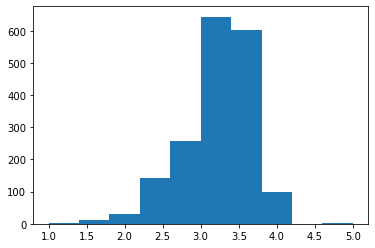

In [5]:
#plot histogram to get rating distribution
plt.hist(ratings)
plt.show()

In [6]:
#select all tags with class Company and append the text within the tags to a list
companylst = soup.find_all(attrs = {'class': 'Company'})
company = []
for i in range(1, len(companylst)):
  company.append(companylst[i].get_text())
company

['A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'Acalli',
 'Acalli',
 'Adi',
 'Adi',
 'Adi',
 'Adi',
 'Aequare (Gianduja)',
 'Aequare (Gianduja)',
 'Ah Cacao',
 "Akesson's (Pralus)",
 "Akesson's (Pralus)",
 "Akesson's (Pralus)",
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alexandre',
 'Alexandre',
 'Alexandre',
 'Alexandre',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amatller (Simon Coll)

In [7]:
#create a datframe with company and ratings as columns
cocoa_ratings_df = pd.DataFrame(zip(company, ratings), columns = ['Company', 'Ratings'])
cocoa_ratings_df

,Company,Ratings
0,A. Morin,3.75
1,A. Morin,2.75
2,A. Morin,3.00
3,A. Morin,3.50
4,A. Morin,3.50
...,...,...
1790,Zotter,3.75
1791,Zotter,3.00
1792,Zotter,3.50
1793,Zotter,3.25


In [8]:
#find the top 10 companies accroding to ratings
best_ten_by_ratings = (cocoa_ratings_df.groupby('Company').Ratings.mean().nlargest(10))
best_ten_by_ratings

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64

In [9]:
#select all tags with class CocoaPercent and append the text as a float to a list
cocoa_percentlst = soup.select('.CocoaPercent')
cocoa_percent = []
for i in range(1, len(cocoa_percentlst)):
  cocoa_percent.append(float(cocoa_percentlst[i].get_text().strip('%')))
cocoa_percent

[63.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 63.0,
 70.0,
 63.0,
 70.0,
 70.0,
 60.0,
 80.0,
 88.0,
 72.0,
 55.0,
 70.0,
 70.0,
 75.0,
 75.0,
 75.0,
 65.0,
 75.0,
 75.0,
 75.0,
 75.0,
 70.0,
 70.0,
 70.0,
 70.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 80.0,
 60.0,
 60.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 85.0,
 85.0,
 72.0,
 73.0,
 64.0,
 66.0,
 75.0,
 63.0,
 70.0,
 68.0,
 70.0,
 70.0,
 75.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 63.0,
 70.0,
 66.0,
 75.0,
 85.0,
 50.0,
 75.0,
 60.0,
 75.0,
 75.0,
 75.0,
 72.0,
 75.0,
 75.0,
 70.0,
 70.0,
 73.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 73.0,
 70.0,
 68.0,
 70.0,
 70.0,
 70.0,
 70.0,
 75.0,
 70.0,
 75.0,
 72.0,
 72.0,
 72.0,
 72.0,
 100.0,
 72.0,
 72.0,
 72.0,
 72.0,
 75.0,
 72.0,
 72.0,
 80.0,
 75.0,
 72.0,
 72.0,
 72.0,
 68.0,
 72.0,
 70.0,
 77.0,
 75.0

In [10]:
#Add the cocoa percent as a column to the cocoa ratigs dataframe
cocoa_ratings_df['CocoaPercentage'] = cocoa_percent
cocoa_ratings_df

,Company,Ratings,CocoaPercentage
0,A. Morin,3.75,63.0
1,A. Morin,2.75,70.0
2,A. Morin,3.00,70.0
3,A. Morin,3.50,70.0
4,A. Morin,3.50,70.0
...,...,...,...
1790,Zotter,3.75,70.0
1791,Zotter,3.00,65.0
1792,Zotter,3.50,65.0
1793,Zotter,3.25,62.0


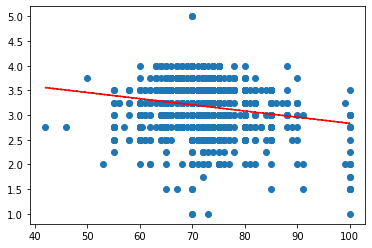

In [11]:
#plot a scatter plot and check the correlation between ratings and cocoa percent
plt.scatter(cocoa_ratings_df.CocoaPercentage, cocoa_ratings_df.Ratings)
z = np.polyfit(cocoa_ratings_df.CocoaPercentage, cocoa_ratings_df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(cocoa_ratings_df.CocoaPercentage, line_function(cocoa_ratings_df.CocoaPercentage), "r--")
plt.show()

In [12]:
#select all tags with class Origin and add the text to a list
bean_originlst = soup.find_all(attrs = {'class': 'Origin'})
bean_origin = []
for i in range(1, len(bean_originlst)):
  bean_origin.append(bean_originlst[i].get_text())
bean_origin

['Agua Grande',
 'Kpime',
 'Atsane',
 'Akata',
 'Quilla',
 'Carenero',
 'Cuba',
 'Sur del Lago',
 'Puerto Cabello',
 'Pablino',
 'Panama',
 'Madagascar',
 'Brazil',
 'Equateur',
 'Colombie',
 'Birmanie',
 'Papua New Guinea',
 'Chuao',
 'Piura',
 'Chanchamayo Province',
 'Chanchamayo Province',
 'Bolivia',
 'Peru',
 'Chulucanas, El Platanal',
 'Tumbes, Norandino',
 'Vanua Levu',
 'Vanua Levu, Toto-A',
 'Vanua Levu',
 'Vanua Levu, Ami-Ami-CA',
 'Los Rios, Quevedo, Arriba',
 'Los Rios, Quevedo, Arriba',
 'Tabasco',
 'Bali (west), Sukrama Family, Melaya area',
 'Madagascar, Ambolikapiky P.',
 'Monte Alegre, D. Badero',
 'Trinite',
 'Vietnam',
 'Madagascar',
 'Chuao',
 'Piura, Perou',
 'Winak Coop, Napo',
 'La Dalia, Matagalpa',
 'Tien Giang',
 'Makwale Village, Kyela',
 'Momotombo',
 'Acopagro',
 'CIAAB Coop',
 'Villa Andina',
 'Gruppo Salinas',
 'Sur del Lago',
 'Conacado',
 'Bolivia',
 'Bolivia',
 'Peru',
 'Morobe',
 'Dos Rios',
 'Guayas',
 'Chuao',
 'Montanya',
 'Bali, Jembrana',
 'Mada

In [13]:
#select all tages with class CompanyLocation and add the text to a list
countrylst = soup.find_all(attrs = {'class': 'CompanyLocation'})
country = []
for i in range(1, len(countrylst)):
  country.append(countrylst[i].get_text())
country

['France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'U.S.A.',
 'U.S.A.',
 'Fiji',
 'Fiji',
 'Fiji',
 'Fiji',
 'Ecuador',
 'Ecuador',
 'Mexico',
 'Switzerland',
 'Switzerland',
 'Switzerland',
 'France',
 'France',
 'France',
 'France',
 'France',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'U.S.A.',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Peru',
 'Peru',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Brazil',
 'Brazil',
 '

In [14]:
#add both bean origin and country as columns to the cocoa ratings dataframe
cocoa_ratings_df['BeanOrigin'] = bean_origin
cocoa_ratings_df['Country'] = country
cocoa_ratings_df


,Company,Ratings,CocoaPercentage,BeanOrigin,Country
0,A. Morin,3.75,63.0,Agua Grande,France
1,A. Morin,2.75,70.0,Kpime,France
2,A. Morin,3.00,70.0,Atsane,France
3,A. Morin,3.50,70.0,Akata,France
4,A. Morin,3.50,70.0,Quilla,France
...,...,...,...,...,...
1790,Zotter,3.75,70.0,Peru,Austria
1791,Zotter,3.00,65.0,Congo,Austria
1792,Zotter,3.50,65.0,Kerala State,Austria
1793,Zotter,3.25,62.0,Kerala State,Austria


In [15]:
#find the best 10 bean origins according to ratings
best_origins = cocoa_ratings_df.groupby('BeanOrigin').Ratings.mean().nlargest(50)
best_origins

BeanOrigin
Toscano Black                                  4.166667
ABOCFA Coop                                    4.000000
Alto Beni, Cru Savage                          4.000000
Asante                                         4.000000
Bali, Sukrama Bros. Farm, Melaya, 62hr C       4.000000
Bellavista Coop, #225, LR, MC, CG Exclusive    4.000000
Cabosse                                        4.000000
Carenero Superior, Urrutia, Barlovento         4.000000
Chuao, #217, DR, MC                            4.000000
Claudio Corallo w/ nibs                        4.000000
Colombian Dark                                 4.000000
Coopertiva Amazona w/ nibs                     4.000000
Corona Arriba                                  4.000000
Coto Brus, Heirloom, Batch 1                   4.000000
Coto Brus, Terciopelo                          4.000000
Crazy 88                                       4.000000
Dancing in Your Head, 5 bean blend             4.000000
Dual Origins, Sambirano, Elvesia     

In [16]:
#find the best 10 countries according to ratings
high_rated_countries = cocoa_ratings_df.groupby('Country').Ratings.mean().nlargest(20)
high_rated_countries

Country
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Switzerland    3.342105
Singapore      3.333333
Italy          3.325397
Scotland       3.325000
Canada         3.324000
Argentina      3.305556
Denmark        3.283333
Spain          3.270000
France         3.251603
Bolivia        3.250000
Name: Ratings, dtype: float64